# 📌 Submission Guidelines

### ✅ File Naming Rule  
Submit your notebook with the following format:

`StudentID_YourFullName_LABXX.ipynb`

or

`StudentID_YourFullName_LABXX.html`

**Examples (Correct):**
- `21113456_NguyenVanA_LAB01.ipynb`
- `19122233_TranThiB_LAB02.ipynb`

**Examples (Wrong → 0 points):**
- `Lab01.ipynb`
- `YourName.ipynb`
- `20123456.ipynb`
- `Lab01.pdf`

---

### 📌 Grading Policy

- ❌ Wrong filename format, missing submission, or plagiarism (code identical to others) → 0 points

- ⚠️ Submitting a file without results, incomplete work, or only the assignment description → Maximum 4 points

- ✅ Correct filename + Completed results → Graded normally based on assignment quality (accuracy, clarity, and originality)  

### Note:
- AI assistance is allowed, but you must write the code yourself. All submissions will be checked for originality.

---

# Goal
The goal of this lab is to understand and implement Histogram Matching (Histogram Specification) — a technique used to modify the intensity distribution of one image so that its histogram matches that of another reference image.
Through this exercise, students will learn how histogram matching differs from histogram equalization, and how it can be applied to enhance image consistency across different lighting conditions or sensors.

# Lab Description
In this lab, you will perform practical experiments on Histogram Matching to analyze how it transforms the tonal characteristics of an image to resemble a target reference image.
You will start by selecting a pair of images — one source image (to be transformed) and one reference image (whose histogram will be matched). Then, you will:

Compute and visualize the histograms of both images before and after matching.

Observe how pixel intensity distributions are adjusted through the matching process.

Compare the visual and statistical differences between the original, reference, and matched images.

This lab helps develop intuition about histogram-based image transformations and their effects on contrast, brightness, and overall visual appearance.


# Code Sample

In [ ]:
import matplotlib.pyplot as plt
from skimage import exposure, img_as_float, img_as_ubyte
from skimage.exposure import match_histograms
import cv as cv
from skimage import io
import numpy as np



In [3]:
!gdown 1bS_OUTAWbhKLaoMqXeTFSC8eYOBtv4XH
!gdown 1xhNB5bhnvkF68mj_5ZAkehXUFir_qwLY
!gdown 17B54sFw756wJ9wc-X4eRbWzcnMzAJfGU

Downloading...
From: https://drive.google.com/uc?id=1bS_OUTAWbhKLaoMqXeTFSC8eYOBtv4XH
To: d:\Xu_ly_anh\(2.5-1).jpg

  0%|          | 0.00/86.6k [00:00<?, ?B/s]
100%|██████████| 86.6k/86.6k [00:00<00:00, 1.95MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xhNB5bhnvkF68mj_5ZAkehXUFir_qwLY
To: d:\Xu_ly_anh\(2.5-2).jpg

  0%|          | 0.00/108k [00:00<?, ?B/s]
100%|██████████| 108k/108k [00:00<00:00, 570kB/s]
100%|██████████| 108k/108k [00:00<00:00, 569kB/s]
Downloading...
From: https://drive.google.com/uc?id=17B54sFw756wJ9wc-X4eRbWzcnMzAJfGU
To: d:\Xu_ly_anh\(2.5-3).jpg

  0%|          | 0.00/91.6k [00:00<?, ?B/s]
100%|██████████| 91.6k/91.6k [00:00<00:00, 766kB/s]
100%|██████████| 91.6k/91.6k [00:00<00:00, 764kB/s]


In [6]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))

  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowFourImages(IM1, IM2, IM3, IM4):
    imshows([IM1, IM2, IM3, IM4], ["Image 1","Image 2", "Image 3", "Image 4"], 2, 2)
def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

In [105]:
img1_path = r"D:\Xu_ly_anh\content\tuan4_5.jpg"
img2_path = r"D:\Xu_ly_anh\content\tuan4_2.jpg"
img3_path = r"D:\Xu_ly_anh\content\tuan4_3.jpg"

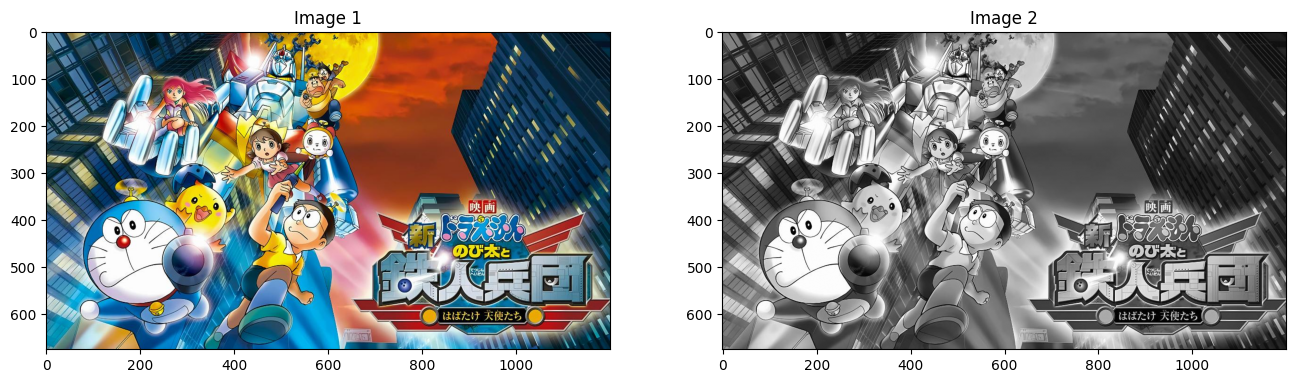

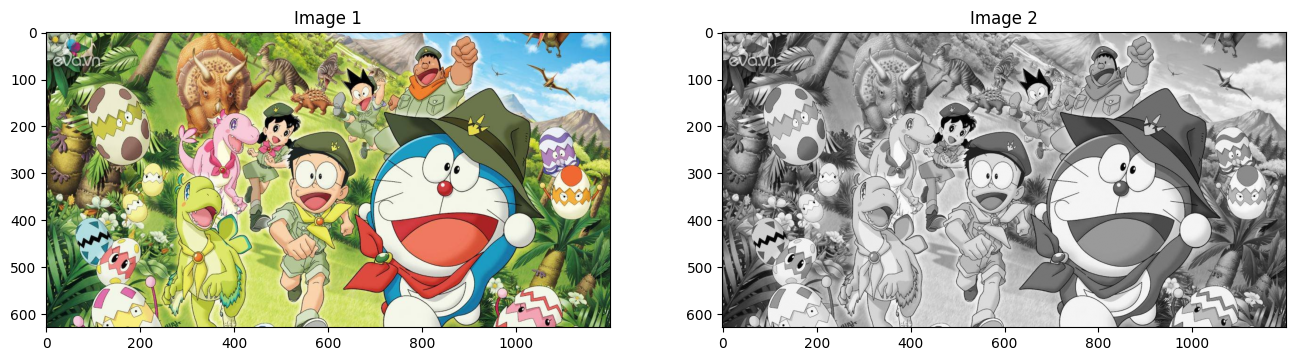

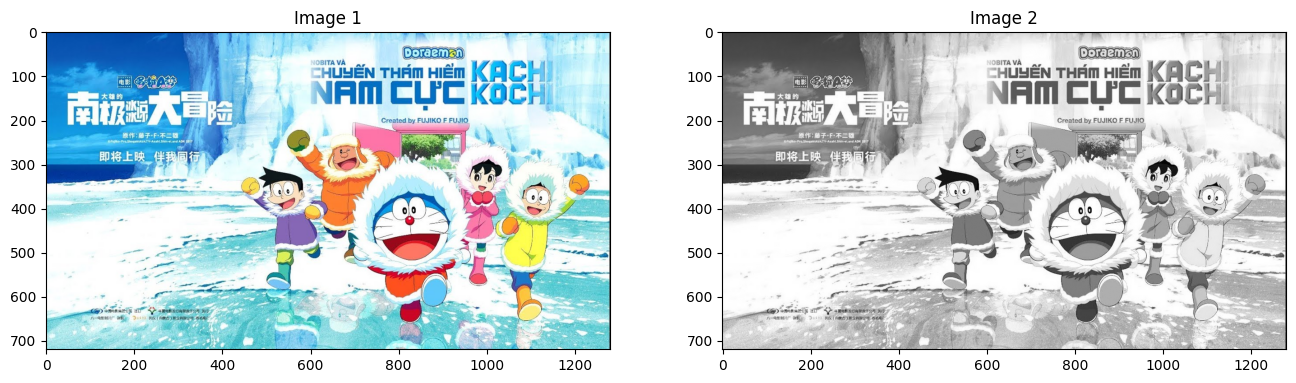

In [106]:
img1 = cv.imread(img1_path)
img2 = cv.imread(img2_path)
img3 = cv.imread(img3_path)


img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

img1_gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
img3_gray = cv.cvtColor(img3, cv.COLOR_RGB2GRAY)


ShowTwoImages(img1, img1_gray)
ShowTwoImages(img2, img2_gray)
ShowTwoImages(img3, img3_gray)


In [107]:
image = img2_gray
reference = img1_gray

## Histogram matching


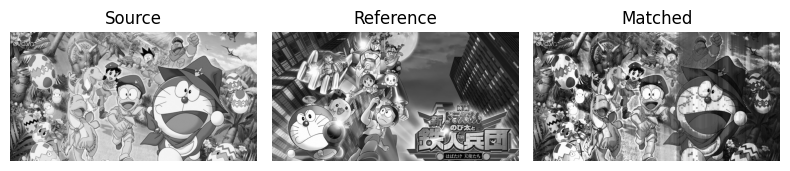

In [108]:
matched = match_histograms(image, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image, cmap="gray")
ax1.set_title('Source')
ax2.imshow(reference, cmap="gray")
ax2.set_title('Reference')
ax3.imshow(matched, cmap="gray")
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

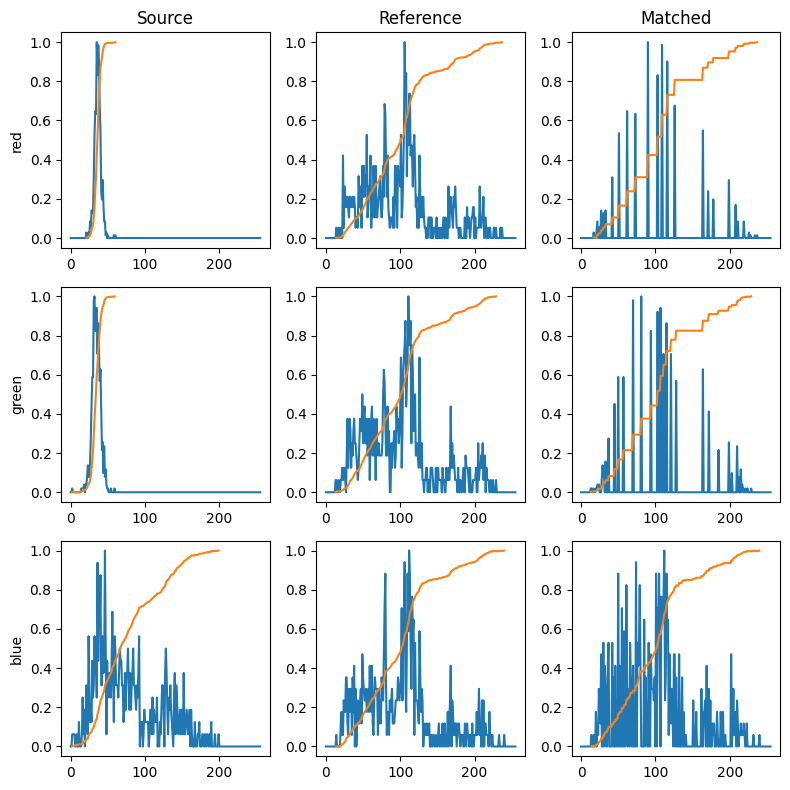

In [109]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

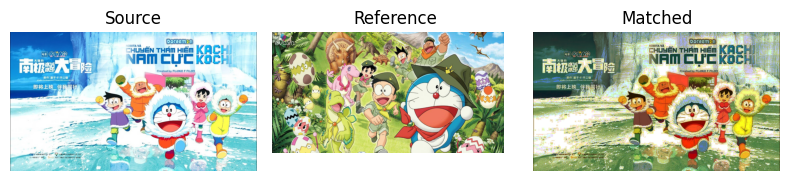

In [110]:
matched2 = match_histograms(img3, img2, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(img3)
ax1.set_title('Source')
ax2.imshow(img2)
ax2.set_title('Reference')
ax3.imshow(matched2)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

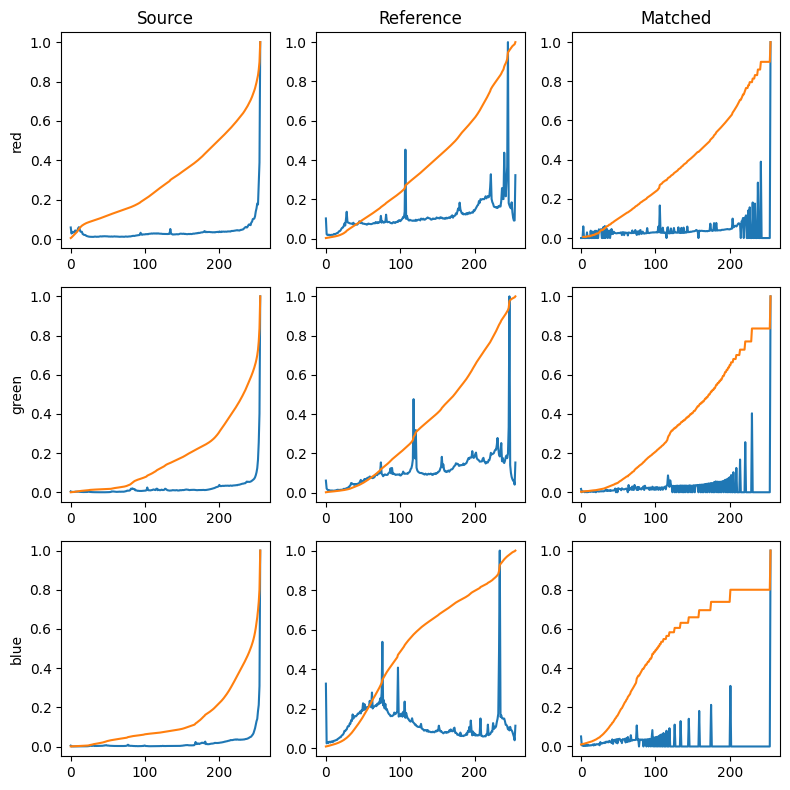

In [111]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((img3, img2, matched2)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

## Histogram Matching vs Histogram Equalization

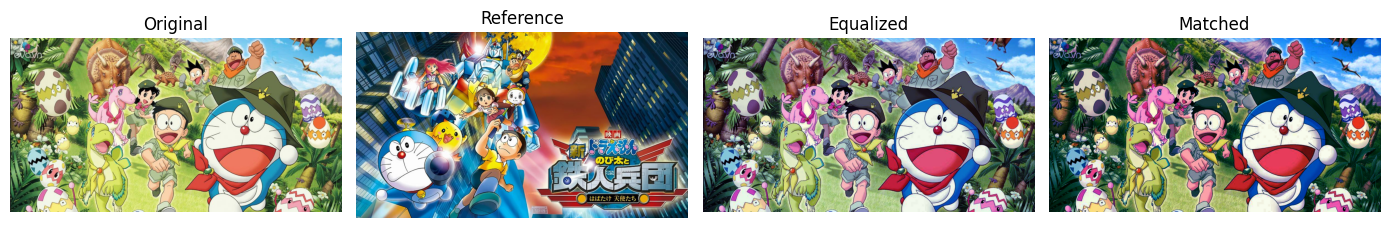

In [112]:
source = img2
reference = img1

image_float = img_as_float(source)
equalized = np.zeros_like(image_float)
for i in range(3):
    equalized[..., i] = exposure.equalize_hist(image_float[..., i])

equalized_uint8 = img_as_ubyte(equalized)


matched = match_histograms(source, reference, channel_axis=-1)


fig, axes = plt.subplots(1, 4, figsize=(14, 4))
titles = ['Original',  'Reference','Equalized', 'Matched']
images = [source,  reference, equalized_uint8, matched]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


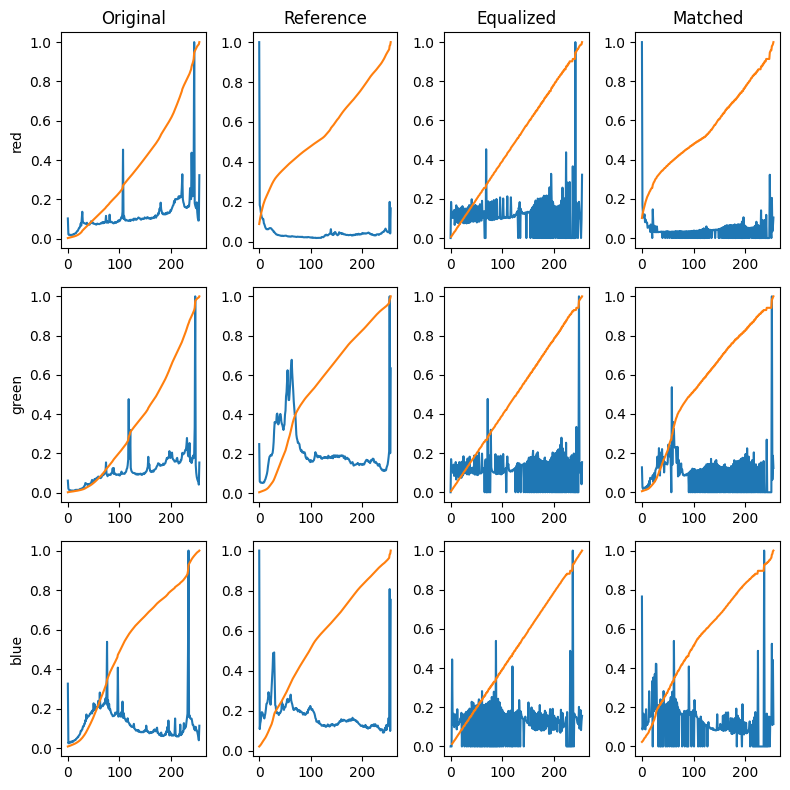

In [113]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8, 8))


for i, img in enumerate(images):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

for id, ax in enumerate(titles):
    axes[0, id].set_title(ax)


plt.tight_layout()
plt.show()

## Local Histogram Matching (CLAHE-like)

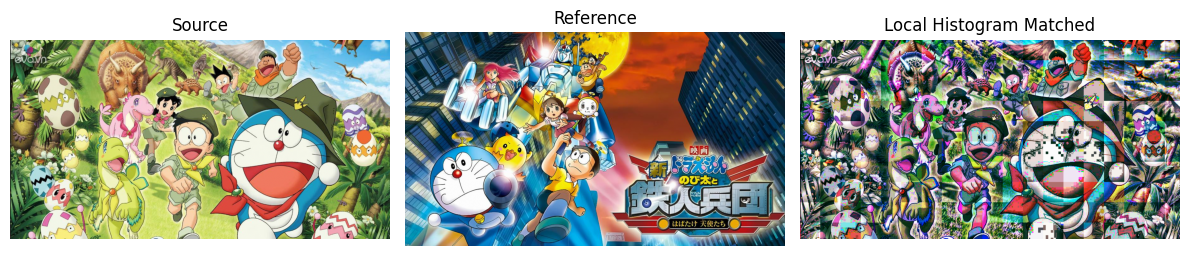

In [114]:
def local_histogram_match(src, ref, tile_size=64):
    src = img_as_float(src)
    ref = img_as_float(ref)

    h, w, _ = src.shape
    matched = np.zeros_like(src)

    for y in range(0, h, tile_size):
        for x in range(0, w, tile_size):
            y_end = min(y + tile_size, h)
            x_end = min(x + tile_size, w)

            region = src[y:y_end, x:x_end]

            matched[y:y_end, x:x_end] = exposure.match_histograms(
                region, ref, channel_axis=-1
            )

    return matched


local_matched = local_histogram_match(source, reference, tile_size=64)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))
images1 = [source, reference, local_matched]
titles1 = ['Source', 'Reference', 'Local Histogram Matched']
for ax, img, title in zip(axes,images1 , titles1):
    ax.imshow(np.clip(img_as_float(img), 0, 1))
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

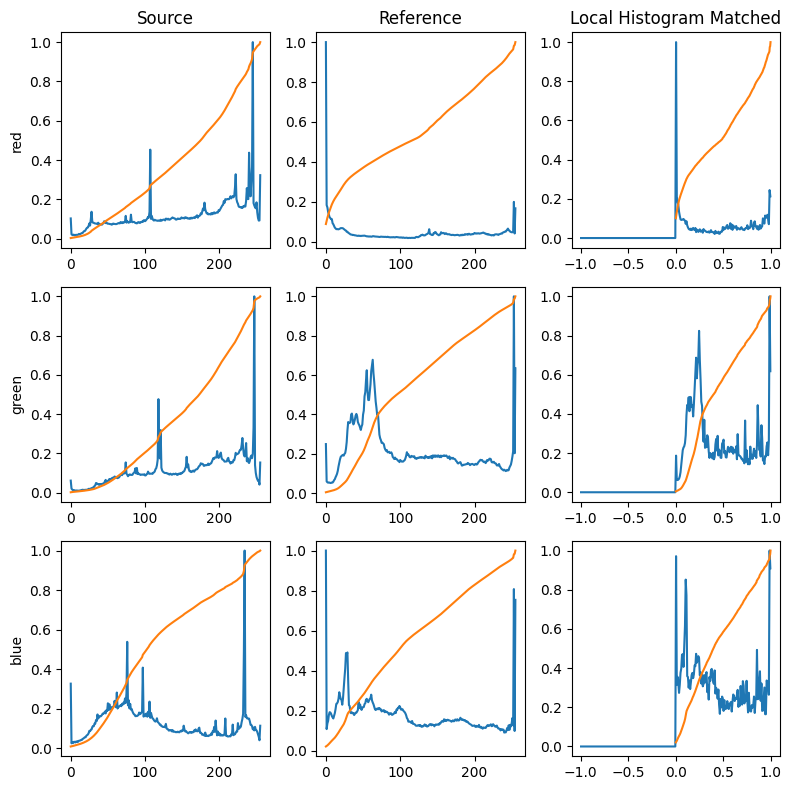

In [115]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate(images1):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

for id, ax in enumerate(titles1):
    axes[0, id].set_title(ax)


plt.tight_layout()
plt.show()

# Homework

1. Choose an external image (from the internet or your computer) and complete all the above tasks.

2. Histogram Matching:
    -  Perform histogram matching on individual RGB channels separately, and then perform matching in the YCrCb or LAB color space (matching only the Y or L channel). Compare the results: which color space produces a more natural-looking image?

    - Implement iterative histogram matching, e.g., applying the matching process 2–3 times consecutively using the same reference image. Does the color change become excessive after multiple iterations?


3. Histogram Matching vs Equalization
    - Write code to compute the intensity entropy of the original, equalized, and matched images. Which image has the highest entropy (i.e., contains the most information)?

    - Apply both methods (equalization and matching) on an image with high dynamic range (strong highlights and deep shadows). Which method better restores details in dark regions?

    - Try histogram matching after equalization, and then equalization after histogram matching. How do the results differ? Explain why the order of operations affects the outcome.

    - Write code to generate histogram comparison plots (before and after processing) for each method, and provide a quantitative assessment of average contrast.
    

4. Local Histogram Matching
    - Compare the global histogram of the image after local matching with that of the original image. Are there any significant changes?

    - Compare local histogram matching results with global histogram matching. Which approach produces better details in dark or bright regions?

    - Implement CLAHE (Contrast Limited Adaptive Histogram Equalization) using cv or skimage, and compare its results with your own local histogram matching method.

    - Combine local histogram matching with adaptive gamma correction (compute a separate gamma value for each local region). Does this improve detail visibility in bright and dark areas


5. Report
    - Display the original image and all processed results after each transformation.

    - Write a short report summarizing the observations and conclusions for each type of transformation.

----------------------------------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
from skimage import exposure, img_as_float, img_as_ubyte
from skimage.exposure import match_histograms
import cv as cv
from skimage import io
import numpy as np

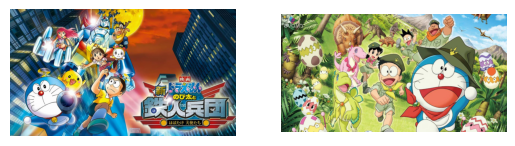

In [2]:
img1_path = r"D:\Xu_ly_anh\content\tuan4_5.jpg"
img2_path = r"D:\Xu_ly_anh\content\tuan4_2.jpg"

img1 = cv.imread(img1_path)
img2 = cv.imread(img2_path)

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

img1_ycr_cb = cv.cvtColor(img1, cv.COLOR_RGB2YCR_CB)
img2_ycr_cb = cv.cvtColor(img2, cv.COLOR_RGB2YCR_CB)

img1_gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

plt.subplot(1, 2 , 1)
plt.imshow(img1)
plt.axis('off')
plt.subplot(1, 2 , 2)
plt.imshow(img2)
plt.axis('off')
plt.show()

# 2 Histogram Matching:
-  Perform histogram matching on individual RGB channels separately, and then perform matching in the YCrCb or LAB color space (matching only the Y or L channel). Compare the results: which color space produces a more natural-looking image?


<function matplotlib.pyplot.show(close=None, block=None)>

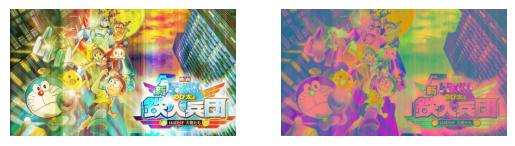

In [3]:
matched_r = match_histograms(img1[:, :, 0], img2[:, :, 0], channel_axis=-1)
matched_g = match_histograms(img1[:, :, 1], img2[:, :, 1], channel_axis=-1)
matched_b = match_histograms(img1[:, :, 2], img2[:, :, 2], channel_axis=-1)
matched_rgb = cv.merge([matched_r, matched_g, matched_b])

matched_y = match_histograms(img1_ycr_cb[:, :, 0], img2_ycr_cb[:, :, 0], channel_axis=-1)
matched_ycr_cb = cv.merge([matched_y, img1_ycr_cb[:, :, 1], img1_ycr_cb[:, :, 2]])

plt.subplot(1, 2, 1)
plt.imshow(matched_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(matched_ycr_cb)
plt.axis('off')
plt.show

=> Hợp ở kênh màu r, g, b có màu sắc nhìn tự nhiên hơn so với YCrCb

- Implement iterative histogram matching, e.g., applying the matching process 2–3 times consecutively using the same reference image. Does the color change become excessive after multiple iterations?


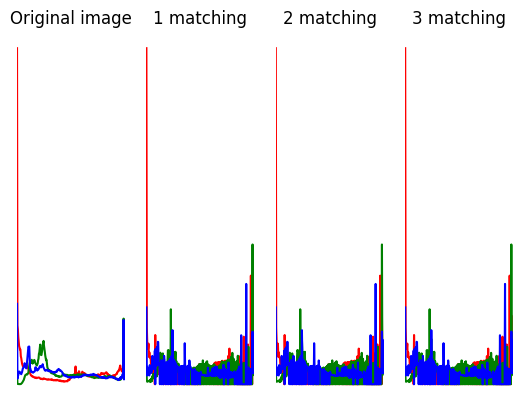

In [4]:
color = ('r', 'g', 'b')
plt.subplot(1, 4, 1)
for channel,col in enumerate(color):
    histr = cv.calcHist([img1],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Original image')
plt.axis('off')

matched_1 = match_histograms(img2, img1, channel_axis=-1)
plt.subplot(1, 4, 2)
for channel,col in enumerate(color):
    histr = cv.calcHist([matched_1],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('1 matching')
plt.axis('off')

matched_2 = match_histograms(matched_1, img1, channel_axis=-1)
plt.subplot(1, 4, 3)
for channel,col in enumerate(color):
    histr = cv.calcHist([matched_2],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('2 matching')
plt.axis('off')

matched_3 = match_histograms(matched_2, img1, channel_axis=-1)
plt.subplot(1, 4, 4)
for channel,col in enumerate(color):
    histr = cv.calcHist([matched_3],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('3 matching')
plt.axis('off')
plt.show()

=> sau lần 1 matching thì các lần sau matching cho ra histogram giống nhau

# 3. Histogram Matching vs Equalization
- Write code to compute the intensity entropy of the original, equalized, and matched images. Which image has the highest entropy (i.e., contains the most information)?

In [5]:
def calculate_entropy_numpy(img):
    pixels = img.ravel()
    counts = np.bincount(pixels, minlength = 256)
    probabilities = counts / len(pixels)
    p_nonzero = probabilities[probabilities > 0]
    entropy = -np.sum(p_nonzero * np.log2(p_nonzero))
    return entropy

def calculate_entrophy(img):
    r, g, b = cv.split(img)
    entrophy_r = calculate_entropy_numpy(r)
    entrophy_g = calculate_entropy_numpy(g)
    entrophy_b = calculate_entropy_numpy(b)
    return (entrophy_r + entrophy_g + entrophy_b) / 3.0

In [8]:
equalized_r = cv.equalizeHist(img2[:, :, 0])
equalized_g = cv.equalizeHist(img2[:, :, 1])
equalized_b = cv.equalizeHist(img2[:, :, 2])
equalized = cv.merge([equalized_r, equalized_g, equalized_b])

print(calculate_entrophy(img2))
print(calculate_entrophy(equalized))
print(calculate_entrophy(matched_1))

7.739102525062145
7.508231075443781
7.159617853081477


=> Ảnh equalized có entrophy cao nhất (nhiều thông tin nhất)

- Apply both methods (equalization and matching) on an image with high dynamic range (strong highlights and deep shadows). Which method better restores details in dark regions?

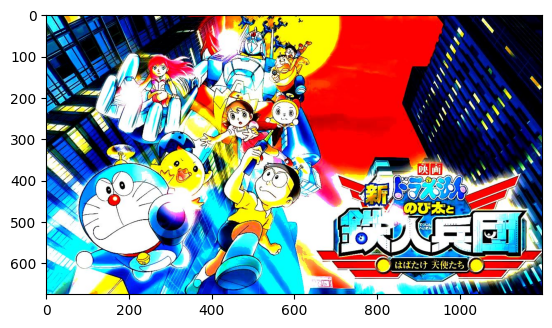

In [ ]:
HDR_img_path = r"D:\Xu_ly_anh\HDR.jpg"
HDR_img = cv.imread(HDR_img_path)
HDR_img = cv.cvtColor(HDR_img, cv.COLOR_BGR2RGB)

plt.imshow(HDR_img)
plt.axis('off')
plt.show()

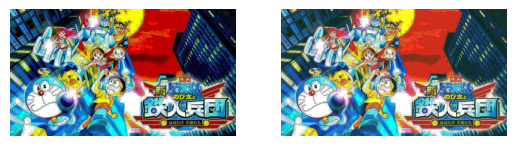

In [35]:
HDR_r = cv.equalizeHist(HDR_img[:, :, 0])
HDR_g = cv.equalizeHist(HDR_img[:, :, 1])
HDR_b = cv.equalizeHist(HDR_img[:, :, 2])
equalized_HDR = cv.merge([HDR_r, HDR_g, HDR_b])

matched_HDR = match_histograms(HDR_img, img1, channel_axis=-1)

plt.subplot(1, 2, 1)
plt.imshow(equalized_HDR)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(matched_HDR)
plt.axis('off')
plt.show()

=> ảnh equalized có vẻ làm rõ các chi tiết ở vùng tối hơn

- Try histogram matching after equalization, and then equalization after histogram matching. How do the results differ? Explain why the order of operations affects the outcome.

<function matplotlib.pyplot.show(close=None, block=None)>

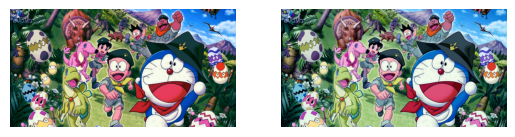

In [13]:
equalized_matched = match_histograms(equalized, img1, channel_axis=-1)
matched = match_histograms(img2, img1, channel_axis=-1)
equalized_r = cv.equalizeHist(matched[:, :, 0])
equalized_g = cv.equalizeHist(matched[:, :, 1])
equalized_b = cv.equalizeHist(matched[:, :, 2])
matched_equalized = cv.merge([equalized_r, equalized_g, equalized_b])

plt.subplot(1, 2, 1)
plt.imshow(equalized_matched)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(matched_equalized)
plt.axis('off')
plt.show

=> ảnh sau khi equalized rồi matched có gam màu đậm hơn so với matched rồi equalized
Sự khác nhau này là vì ảnh đầu đã dàn phẳng A rồi bóp méo theo B từ đó làm histogram của nó sẽ giống B hơn, có độ tương phản của ảnh B hơn. Trong khi đó ảnh thứ 2 bóp méo A theo B sau đó dàn phẳng, từ đó làm histogram của nó phẳng giống (equalized(A)), có độ tương phản tối đa do đã cân bằng

- Write code to generate histogram comparison plots (before and after processing) for each method, and provide a quantitative assessment of average contrast.

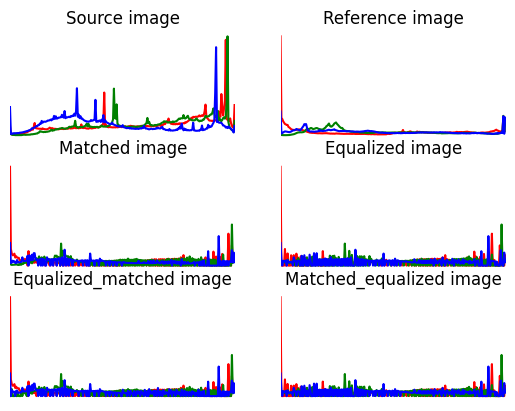

In [39]:
color = ('r', 'g', 'b')
plt.subplot(3, 2, 1)
for channel,col in enumerate(color):
    histr = cv.calcHist([img2],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Source image')
plt.axis('off')

plt.subplot(3, 2, 2)
for channel,col in enumerate(color):
    histr = cv.calcHist([img1],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Reference image')
plt.axis('off')

plt.subplot(3, 2, 3)
for channel,col in enumerate(color):
    histr = cv.calcHist([matched],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Matched image')
plt.axis('off')

plt.subplot(3, 2, 4)
for channel,col in enumerate(color):
    histr = cv.calcHist([equalized],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Equalized image')
plt.axis('off')

plt.subplot(3, 2, 5)
for channel,col in enumerate(color):
    histr = cv.calcHist([equalized_matched],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Equalized_matched image')
plt.axis('off')

plt.subplot(3, 2, 6)
for channel,col in enumerate(color):
    histr = cv.calcHist([matched_equalized],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Matched_equalized image')
plt.axis('off')
plt.show()

# 4. Local Histogram Matching
 - Compare the global histogram of the image after local matching with that of the original image. Are there any significant changes?

In [41]:
def local_histogram_match(src, ref, tile_size=64):
    src = img_as_float(src)
    ref = img_as_float(ref)

    h, w, _ = src.shape
    matched = np.zeros_like(src)

    for y in range(0, h, tile_size):
        for x in range(0, w, tile_size):
            y_end = min(y + tile_size, h)
            x_end = min(x + tile_size, w)

            region = src[y:y_end, x:x_end]

            matched[y:y_end, x:x_end] = exposure.match_histograms(
                region, ref, channel_axis=-1
            )

    return matched

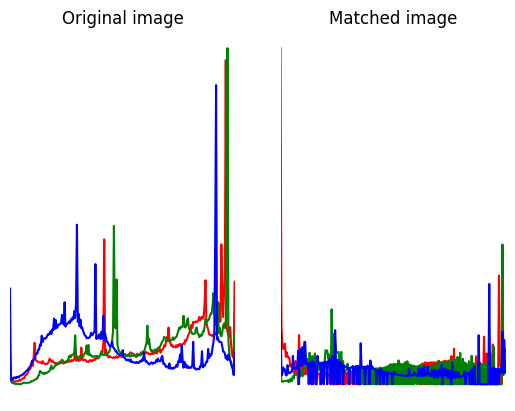

In [53]:
color = ('r', 'g', 'b')
plt.subplot(1, 2, 1)
for channel,col in enumerate(color):
    histr = cv.calcHist([img2],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Original image')
plt.axis('off')

local_matched = local_histogram_match(img2, img1, tile_size=1024)
plt.subplot(1, 2, 2)
for channel,col in enumerate(color):
    histr = cv.calcHist([matched],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Matched image')
plt.axis('off')
plt.show()

=> ảnh sau matched thì biểu đồ của nó đều và có giá trị đồng đều hơn cũng như thấp hơn đáng kể so với orginal image

- Compare local histogram matching results with global histogram matching. Which approach produces better details in dark or bright regions?

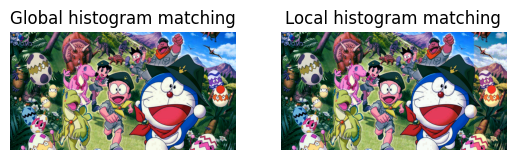

In [54]:
plt.subplot(1, 2, 1)
plt.imshow(matched)
plt.axis('off')
plt.title('Global histogram matching')

plt.subplot(1, 2, 2)
plt.imshow(local_matched)
plt.axis('off')
plt.title('Local histogram matching')
plt.show()

=> cả 2 hình ảnh đều khá giống nhau nên 2 phương pháp có mức độ chi tiết ở vùng tối/sáng như nhau

- Implement CLAHE (Contrast Limited Adaptive Histogram Equalization) using cv or skimage, and compare its results with your own local histogram matching method.

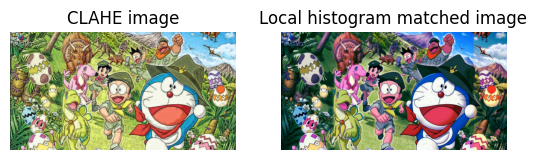

In [61]:
img_float = img_as_float(img2)
clahe_img_float = exposure.equalize_adapthist(
    img_float, 
    kernel_size=(8, 8), 
    clip_limit=0.02
)
clahe_img = img_as_ubyte(clahe_img_float)

plt.subplot(1, 2, 1)
plt.imshow(clahe_img)
plt.axis('off')
plt.title('CLAHE image')

plt.subplot(1, 2, 2)
plt.imshow(local_matched)
plt.axis('off')
plt.title('Local histogram matched image')
plt.show()

- Combine local histogram matching with adaptive gamma correction (compute a separate gamma value for each local region). Does this improve detail visibility in bright and dark areas

In [69]:
def local_match_gamma_correction(src, ref, tile_size=64):
    src = img_as_float(src)
    ref = img_as_float(ref)
    EPSILON = 1e-7

    h, w, _ = src.shape
    matched = np.zeros_like(src)

    for y in range(0, h, tile_size):
        for x in range(0, w, tile_size):
            y_end = min(y + tile_size, h)
            x_end = min(x + tile_size, w)

            region = src[y:y_end, x:x_end]

            matched_region = exposure.match_histograms(
                region, ref, channel_axis=-1
            )
 
            mean_intensity = np.mean(matched_region)
            mean_intensity = np.clip(mean_intensity, EPSILON, 1.0 - EPSILON)

            gamma = np.log(0.5) / np.log(mean_intensity)
            gamma = np.clip(gamma, 0.3, 3.0)

            corrected_region = exposure.adjust_gamma(matched_region, gamma)

            matched[y:y_end, x:x_end] = corrected_region

    return matched

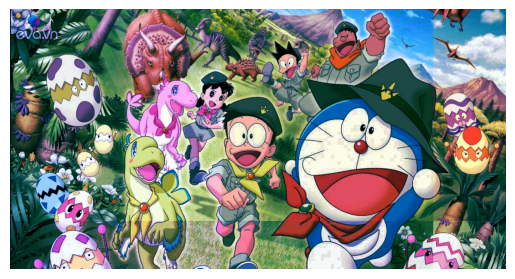

In [70]:
local_matched_gamma = local_match_gamma_correction(img2, img1, tile_size=512)
plt.imshow(local_matched_gamma)
plt.axis('off')
plt.show()

=> Phương pháp này tăng chi tiết hơn ở các vùng tối và sáng, làm ảnh dễ nhìn và màu sắc nét hơn